In [1]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib

while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

# Docs
This notebook produces figures how the Euclidean distance behaves when dealing with **normalized** vectors in high-dimensional space.

In [32]:
# --- other imports ---
import math

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc, Circle

from blog.post_0011.helpers import cosine_similarity, euclidean_distance, sample_vector
from shared.distributions import empirical_pdf
from shared.plotting import save_fig
from shared.plotting.colors import CLR_BLUE, CLR_GREEN, CLR_GREY, CLR_RED

In [3]:
# --- matplotlib ------------------------------------------
plt.rcParams["figure.dpi"] = 150

# --- settings --------------------------------------------
n_dims = [10, 20, 50, 100, 200, 500, 1000]
line_styles = ["-", "-", "-", "--", "--", "--", ":"]
line_colors = [CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE, CLR_GREEN, CLR_RED, CLR_BLUE]

n_samples = 10_000  # number of samples to draw

Saved 'normalized_vectors_2d.webp' with setting '508dpi_q70', resulting in 110_914 bytes (2.46 bits/pixel @ 100dpi)  (8.2sec)


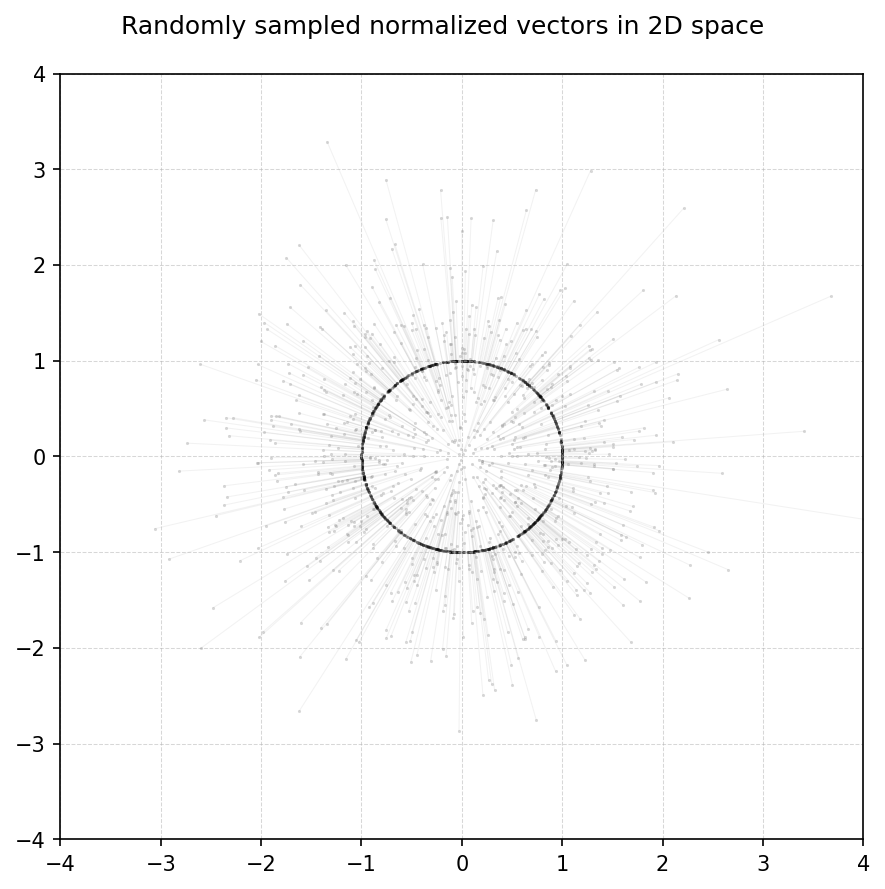

In [7]:
# --- Show distribution -----------------------------------

# init figure
fig, ax = plt.subplots(figsize=(6, 6))

# plot random vectors in 2D space
for i in range(1000):
    v = sample_vector(2)
    v_norm = v / np.linalg.norm(v)

    ax.plot(v[0], v[1], "o", color=CLR_GREY, alpha=0.3, markersize=1.5, markeredgewidth=0)
    ax.plot([v[0], v_norm[0]], [v[1], v_norm[1]], color=CLR_GREY, alpha=0.1, linewidth=0.5, zorder=-2)
    ax.plot(v_norm[0], v_norm[1], "o", color="k", alpha=0.25, markersize=1.5, markeredgewidth=0, zorder=1)

# overlay unit circle
# circle = Circle((0, 0), 1, color='k', alpha=1.0, lw=1, ls='--', fill=False, zorder=-1)
# ax.add_patch(circle)

# decoration
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.grid(True, alpha=0.5, lw=0.5, ls="--")

fig.suptitle("Randomly sampled normalized vectors in 2D space")
fig.tight_layout()

# save in various formats
save_fig(fig, post_nr=11, name="normalized_vectors_2d")

n=   10,  mean=  1.3930,  std=  0.2329
n=   20,  mean=  1.4047,  std=  0.1632
n=   50,  mean=  1.4118,  std=  0.1011
n=  100,  mean=  1.4127,  std=  0.0714
n=  200,  mean=  1.4132,  std=  0.0499
n=  500,  mean=  1.4140,  std=  0.0320
n= 1000,  mean=  1.4142,  std=  0.0225
Saved 'normalized_euclidean_distance.webp' with setting '543dpi_lossless', resulting in 150_070 bytes (2.40 bits/pixel @ 100dpi)  (3.2sec)


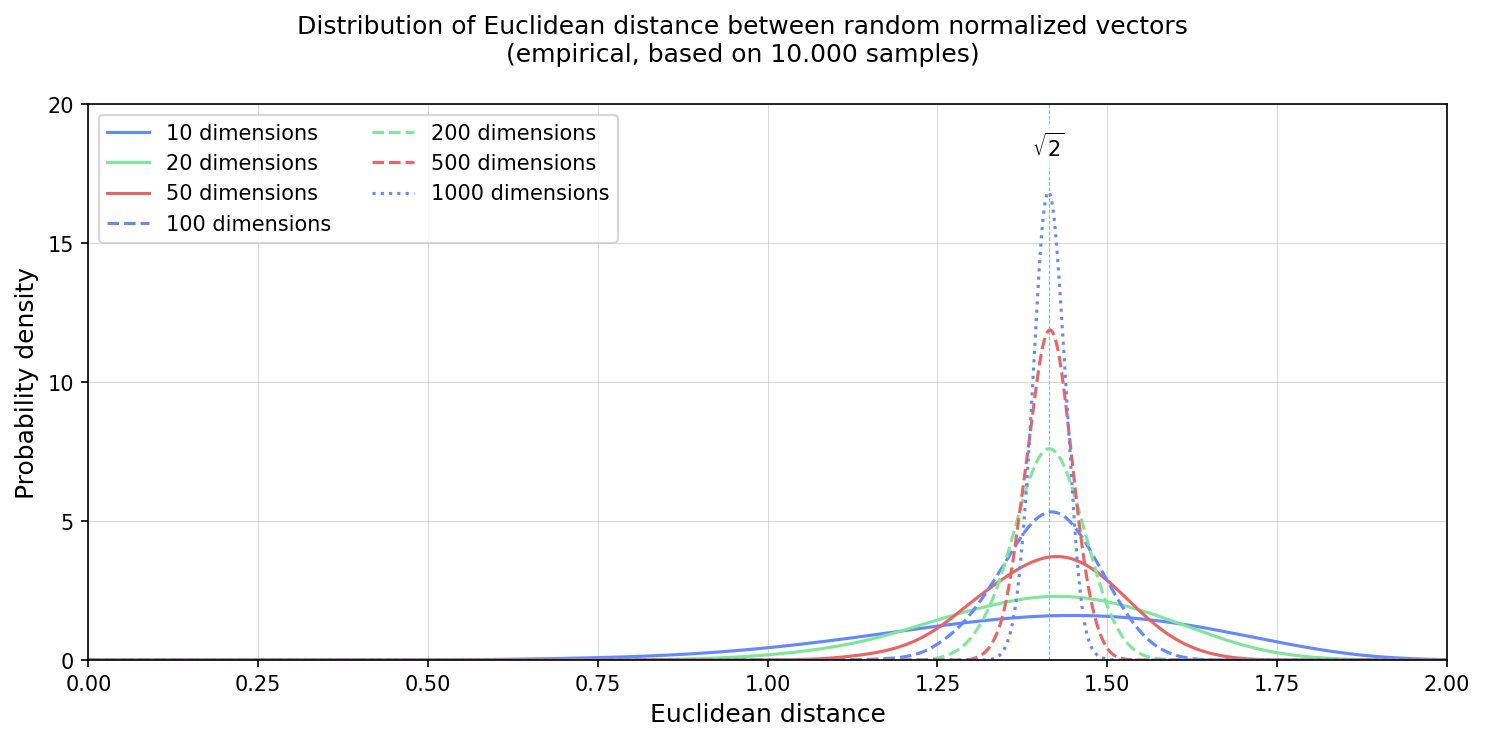

In [5]:
# --- Euclidean distances ---------------------------------

# init figure
fig, ax = plt.subplots(figsize=(10, 5))
x_min = 0.0
x_max = 2.0
x_values = np.linspace(x_min, x_max, 1000)

# plot empirical PDFs
for n, ls, clr in zip(n_dims, line_styles, line_colors):
    # sample Euclidean distances of NORMALIZED vectors
    samples = [euclidean_distance(sample_vector(n, True), sample_vector(n, True)) for _ in range(n_samples)]

    # compute empirical PDF
    pdf_values = empirical_pdf(samples, x_values)

    # plot
    ax.plot(x_values, pdf_values, color=clr, linestyle=ls, label=f"{n} dimensions", lw=1.5)

    # print stats
    print(f"n={n:>5},  mean={np.mean(samples):8.4f},  std={np.std(samples):8.4f}")

ax.vlines(math.sqrt(2), -100, 100, ls="--", alpha=0.5, zorder=-5, lw=0.5)
ax.text(
    math.sqrt(2),
    18.5,
    r"$\sqrt{2}$",
    ha="center",
    va="center",
    bbox=dict(facecolor="white", alpha=0.75, edgecolor="none"),
)

ax.set_xlabel("Euclidean distance", fontsize=12)
ax.set_ylabel("Probability density", fontsize=12)

ax.legend(loc="upper left", ncol=2)

ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 20)
ax.set_yticks([0, 5, 10, 15, 20])
ax.grid(True, alpha=0.5, lw=0.5)

fig.suptitle(
    "Distribution of Euclidean distance between random normalized vectors\n(empirical, based on 10.000 samples)",
    fontsize=12,
)
fig.tight_layout()

# save in various formats
save_fig(fig, post_nr=11, name="normalized_euclidean_distance")

Saved 'normalized_cs_vs_ed.webp' with setting '816dpi_lossless', resulting in 111_494 bytes (2.48 bits/pixel @ 100dpi)  (4.2sec)


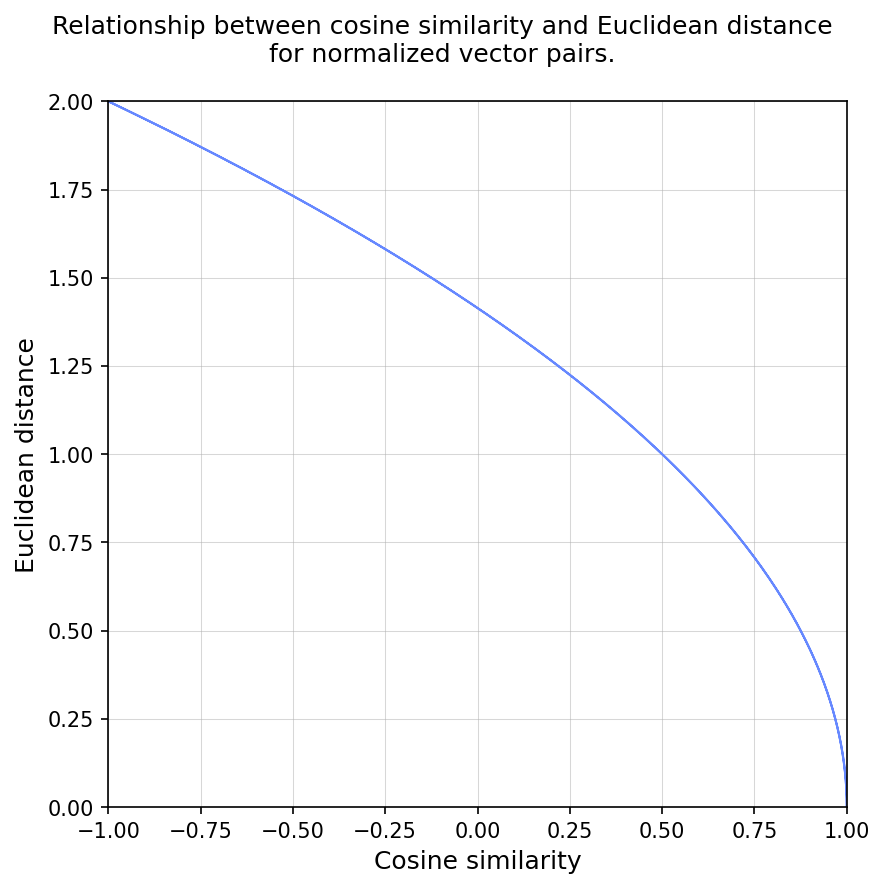

In [15]:
# --- Cosine similarity vs Euclidean Distance -------------

# init figure
fig, ax = plt.subplots(figsize=(6, 6))


# plot cosine similarity vs Euclidean distance
theta_values = np.linspace(0, 2 * math.pi, 1000)
cs = np.cos(theta_values)
# ed = np.sqrt(2 - 2 * cs)  # Euclidean distance for normalized vectors
ed = 2 * np.sin(theta_values / 2)

ax.plot(cs, ed, color=CLR_BLUE, lw=1, alpha=1)

ax.set_xlabel("Cosine similarity", fontsize=12)
ax.set_ylabel("Euclidean distance", fontsize=12)

ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.grid(True, alpha=0.5, lw=0.5)

fig.suptitle("Relationship between cosine similarity and Euclidean distance\nfor normalized vector pairs.", fontsize=12)
fig.tight_layout()

save_fig(fig, post_nr=11, name="normalized_cs_vs_ed")

Saved 'normalized_geometry.webp' with setting '636dpi_lossless', resulting in 112_296 bytes (2.50 bits/pixel @ 100dpi)  (2.3sec)


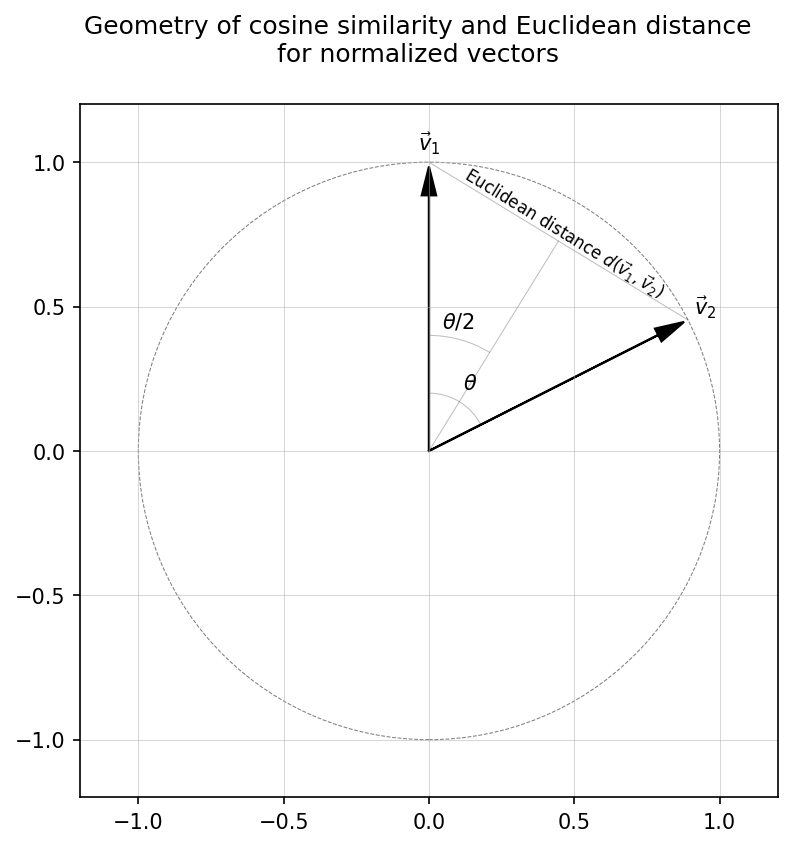

In [53]:
# --- geometric explanation -------------------------------


# init figure
fig, ax = plt.subplots(figsize=(6, 6))

# define vectors
theta = 1.1
v1 = np.array([0, 1])  # vector pointing up
v2 = np.array([math.sin(theta), math.cos(theta)])  # vector at an angle of 0.4 radians
v_mid = (v1 + v2) / 2

# draw v1, v2
c = 0.985  # to compensate for arrows extending beyond the unit circle
ax.arrow(0, 0, c * v1[0], c * v1[1], head_width=0.05, head_length=0.1, fc="k", ec="k", lw=1, length_includes_head=True)
ax.arrow(0, 0, c * v2[0], c * v2[1], head_width=0.05, head_length=0.1, fc="k", ec="k", lw=1, length_includes_head=True)
ax.text(v1[0], v1[1] + 0.02, r"$\vec{v}_1$", ha="center", va="bottom")
ax.text(v2[0] + 0.02, v2[1], r"$\vec{v}_2$", ha="left", va="bottom")

# draw 2 angles
arc_1 = Arc(
    (0, 0),  # center
    0.4,  # width
    0.4,  # height
    angle=0,  # angle of rotation
    theta1=90 - math.degrees(theta),  # start angle in degrees
    theta2=90,  # end angle in degrees
    color="k",
    lw=0.5,
    alpha=0.25,
)
arc_2 = Arc(
    (0, 0),  # center
    0.8,  # width
    0.8,  # height
    angle=0,  # angle of rotation
    theta1=90 - math.degrees(theta) / 2,  # start angle in degrees
    theta2=90,  # end angle in degrees
    color="k",
    lw=0.5,
    alpha=0.25,
)

ax.add_patch(arc_1)
ax.add_patch(arc_2)

ax.text(
    0.32 * v_mid[0],
    0.32 * v_mid[1],
    r"$\theta$",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
    # bbox=dict(facecolor="white", alpha=0.75, edgecolor="none"),
)

ax.text(
    0.10,
    0.45,
    r"$\theta/2$",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
    # bbox=dict(facecolor="white", alpha=0.75, edgecolor="none"),
)

# draw geometry of computing distance
ax.plot([v1[0], v2[0]], [v1[1], v2[1]], lw=0.5, color="k", alpha=0.25, zorder=-1)
ax.plot([0, v_mid[0]], [0, v_mid[1]], lw=0.5, color="k", alpha=0.25, zorder=-1)

ax.text(
    1.04 * v_mid[0],
    1.04 * v_mid[1],
    r"Euclidean distance $d(\vec{v}_1, \vec{v}_2)$",
    ha="center",
    va="center",
    fontsize=8,
    color="k",
    rotation=-math.degrees(theta) / 2,
)

# overlay unit circle
circle = Circle((0, 0), 1, color="k", alpha=0.5, lw=0.5, fill=False, ls="--", zorder=-1)
ax.add_patch(circle)

# decorate
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

ax.grid(True, alpha=0.5, lw=0.5, zorder=-10)

fig.suptitle("Geometry of cosine similarity and Euclidean distance\nfor normalized vectors", fontsize=12)

# save
save_fig(fig, post_nr=11, name="normalized_geometry")